<a href="https://colab.research.google.com/github/alexander-k-j-lim/UNet-brain-MRI-segmentation/blob/master/U-Net_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.metrics import *
import tensorflow as tf
import imageio
import skimage.color as color
import numpy as np

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 1

PATH = '/content/drive/My Drive/keras_png_slices_data' #full path

TRAIN_PATH = '/keras_png_slices_train/'
TEST_PATH = '/keras_png_slices_test/'
VALIDATE_PATH = '/keras_png_slices_validate/'

SEG_TRAIN_PATH = '/keras_png_slices_seg_train/'
SEG_TEST_PATH = '/keras_png_slices_seg_test/'
SEG_VALIDATE_PATH = '/keras_png_slices_seg_validate/'

#TRAIN = np.zeros((len(x_train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)
#TEST = np.zeros((len(x_test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)
#VALIDATE = np.zeros((len(x_vaildate_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)

#SEG_TRAIN = np.zeros((len(x_train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)
#SEG_TEST = np.zeros((len(x_test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)
#SEG_VALIDATE = np.zeros((len(x_vaildate_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)

In [0]:
def read_data(size, image_path, full_path):
  data = np.empty([size, 256, 256])
  data.astype(np.float64)
  FULL_PATH = full_path + image_path
  for n, a in enumerate(next(os.walk(FULL_PATH))[2][:size]):
    data[n] = imageio.imread(FULL_PATH + a)
  return data

In [0]:
#Read data from path forming an array of (size, 256, 256) size
SIZE = 500
TRAIN = read_data(SIZE*10, TRAIN_PATH, PATH)
TEST = read_data(544, TEST_PATH, PATH)
VALIDATE = read_data(1120, VALIDATE_PATH, PATH)

SEG_TRAIN = read_data(SIZE*10, SEG_TRAIN_PATH, PATH)
SEG_TEST = read_data(544, SEG_TEST_PATH, PATH)
SEG_VALIDATE = read_data(1120, SEG_VALIDATE_PATH, PATH)

In [0]:
TRAIN /= 255
TEST /= 255
VALIDATE /= 255

SEG_TRAIN /= 255
SEG_TEST /= 255
SEG_VALIDATE /= 255

TRAIN = TRAIN[:, :, :, np.newaxis]
TEST = TEST[:, :, :, np.newaxis]
VALIDATE = VALIDATE[:, :, :, np.newaxis]

SEG_TRAIN = SEG_TRAIN[:, :, :, np.newaxis]
SEG_TEST = SEG_TEST[:, :, :, np.newaxis]
SEG_VALIDATE = SEG_VALIDATE[:, :, :, np.newaxis]

print("TRAIN shape: ", TRAIN.shape)
print("SEG_TRAIN shape: ", SEG_TRAIN.shape)

TRAIN shape:  (5000, 256, 256, 1)
SEG_TRAIN shape:  (5000, 256, 256, 1)


In [0]:
# Build U-Net model
inputs = Input(shape = (IMG_HEIGHT, IMG_WIDTH, 1))

c1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(64, (3, 3), activation='relu', padding='same') (c1)
mp1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(128, (3, 3), activation='relu', padding='same') (mp1)
c2 = Conv2D(128, (3, 3), activation='relu', padding='same') (c2)
mp2 = MaxPooling2D(pool_size=(2, 2)) (c2)

c3 = Conv2D(256, (3, 3), activation='relu', padding='same') (mp2)
c3 = Conv2D(256, (3, 3), activation='relu', padding='same') (c3)
mp3 = MaxPooling2D(pool_size=(2, 2)) (c3)

c4 = Conv2D(512, (3, 3), activation='relu', padding='same') (mp3)
c4 = Conv2D(512, (3, 3), activation='relu', padding='same') (c4)
mp4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (mp4)
c5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(1024, (2, 2), strides = (2,2)) (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(512, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(512, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(256, (2, 2), strides = (2,2)) (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(256, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(256, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(128, (2, 2), strides = (2,2)) (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(128, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(128, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(64, (2, 2), strides = (2,2)) (c8)
u9 = concatenate([u9, c1])
c9 = Conv2D(64, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(64, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
________________________________________________________________________________

In [0]:
model.fit(x = TRAIN, y = SEG_TRAIN, validation_data=(VALIDATE, SEG_VALIDATE), epochs=5)

Train on 5000 samples, validate on 1120 samples
Epoch 1/5
5000/5000 [==============================] - 289s 58ms/sample - loss: 0.2535 - acc: 0.7870 - val_loss: 0.1645 - val_acc: 0.8254
Epoch 2/5
5000/5000 [==============================] - 269s 54ms/sample - loss: 0.1523 - acc: 0.8262 - val_loss: 0.1550 - val_acc: 0.8260
Epoch 3/5
5000/5000 [==============================] - 269s 54ms/sample - loss: 0.1487 - acc: 0.8268 - val_loss: 0.1531 - val_acc: 0.8272
Epoch 4/5
5000/5000 [==============================] - 269s 54ms/sample - loss: 0.1473 - acc: 0.8270 - val_loss: 0.1533 - val_acc: 0.8271
Epoch 5/5
5000/5000 [==============================] - 269s 54ms/sample - loss: 0.1465 - acc: 0.8272 - val_loss: 0.1524 - val_acc: 0.8275


In [0]:
prediction = model.predict(TEST)

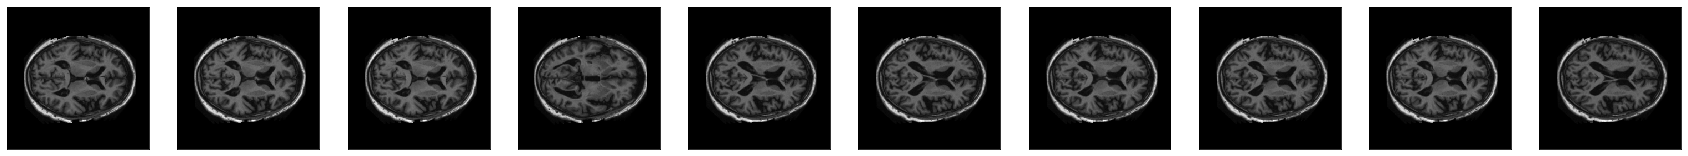

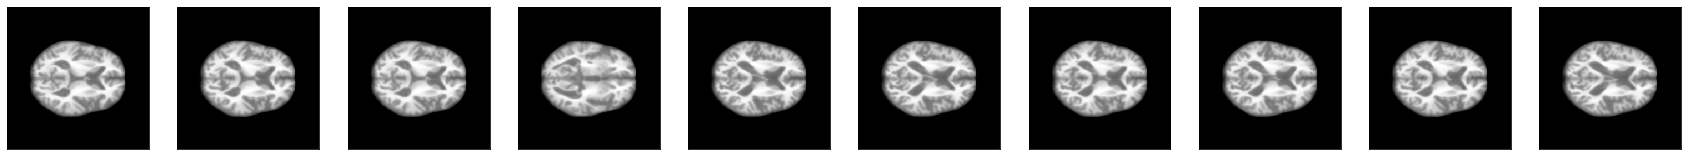

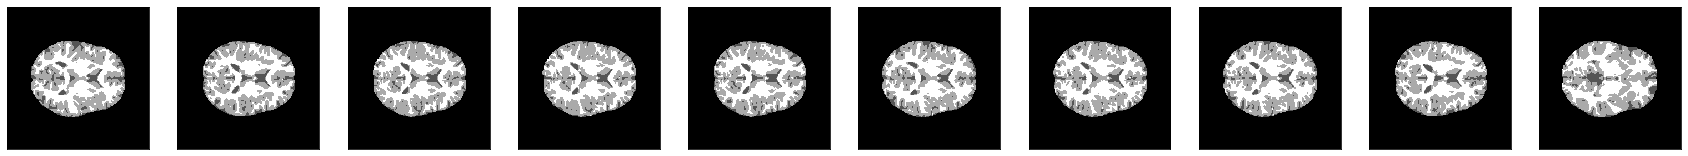

In [0]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(30, 10))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(TEST[i].reshape(256,256))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.figure(figsize=(30, 10))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(prediction[i].reshape(256,256))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.figure(figsize=(30, 10))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(SEG_VALIDATE[i].reshape(256,256))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)